In [2]:
import pandas as pd
import json 

In [3]:
with open('logins.json') as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [18]:
df['day_of_week'] = df['login_time'].dt.day_name()

In [19]:
df.head()

,login_time,day_of_week
0,1970-01-01 20:13:18,Thursday
1,1970-01-01 20:16:10,Thursday
2,1970-01-01 20:16:37,Thursday
3,1970-01-01 20:16:36,Thursday
4,1970-01-01 20:26:21,Thursday


In [20]:
df.dtypes

login_time     datetime64[ns]
day_of_week            object
dtype: object

In [21]:
df['login_time'] = pd.to_datetime(df['login_time'])
print(df.dtypes)

login_time     datetime64[ns]
day_of_week            object
dtype: object


In [22]:
login_counts = df.resample('15T', on='login_time').size()

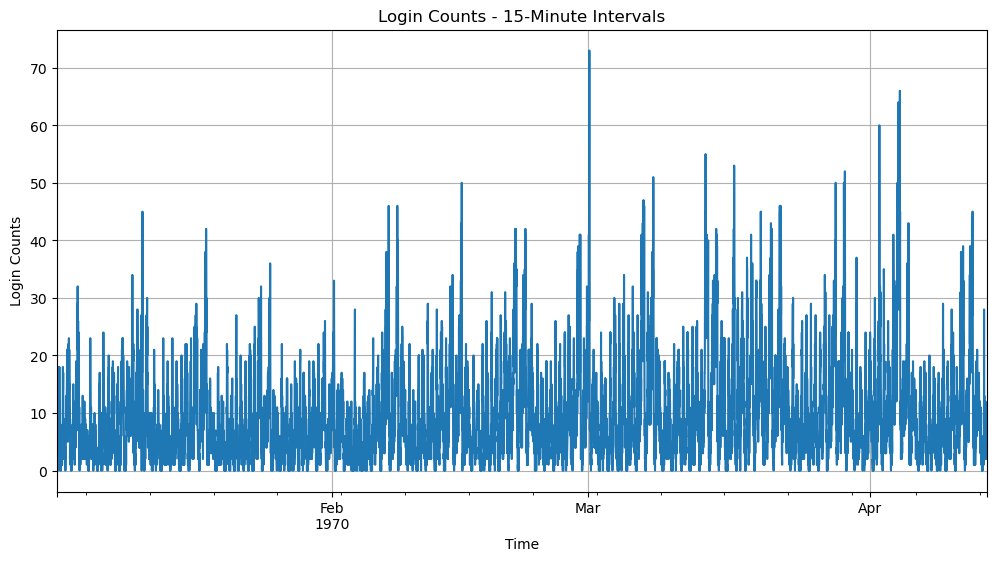

In [10]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(12, 6))
login_counts.plot()
plt.title('Login Counts - 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

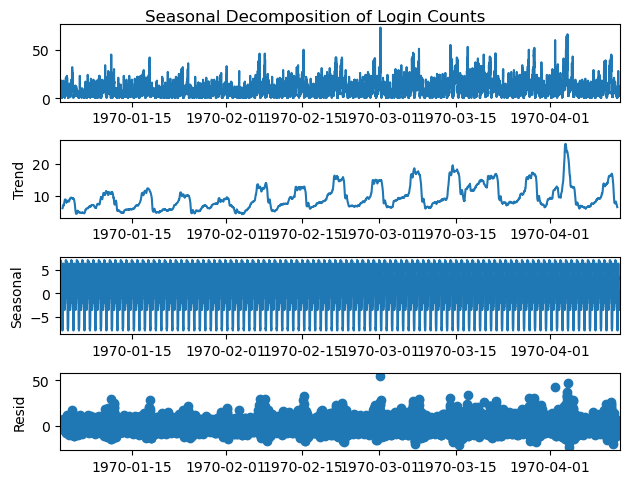

In [11]:
# Perform decomposition for trend, seasonality, and residuals analysis
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(login_counts, model='additive', period=96)  # 96 periods in a day

# Plot decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of Login Counts', y=1.0)
plt.show()


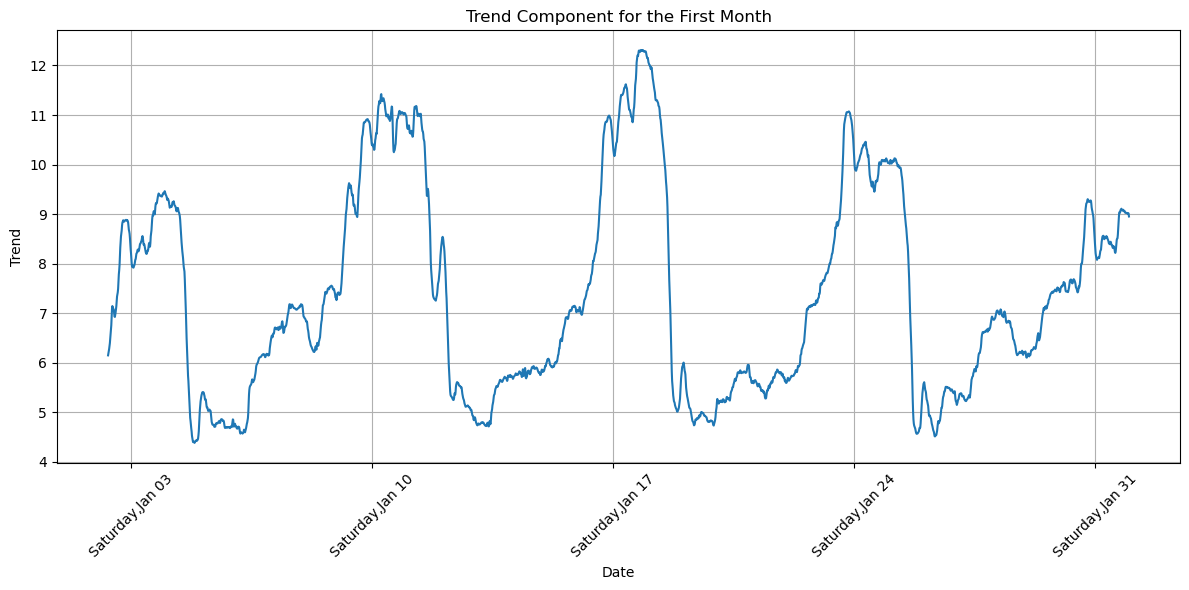

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Extract the trend component
trend = result.trend

# Define the date range for the first month (January)
start_date = pd.Timestamp('1970-01-01')
end_date = start_date + pd.DateOffset(months=1)

# Filter the trend component for the first month
trend_first_month = trend[(trend.index >= start_date) & (trend.index < end_date)]

# Plot the trend for the first month
plt.figure(figsize=(12, 6))
plt.plot(trend_first_month.index, trend_first_month.values)
plt.title('Trend Component for the First Month')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

# Set locator and formatter for x-axis
saturdays = mdates.WeekdayLocator(byweekday=mdates.SATURDAY)
date_formatter = mdates.DateFormatter('%A,%b %d') 

plt.gca().xaxis.set_major_locator(saturdays)
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion. It looks like the user logins tend to happen on the weekends as shown on the visual above. There are still logins during the week but significantly less. The Trend from January to April also shows that the highest peaks were increasing meaning that his logins on the weekends is generally increasing every weekend. 